# 1. The Determinant
Recall that when we discussed linear transformations, some will stretch space out, while others squish it on in:

<img src="images/determinant-stretch.png" width="300">

<img src="images/determinant-squish.png" width="300">

One thing that turns out to be pretty useful when it comes to these transformations, it to measure exactly _how much_ it stretches or squishes things. More specifically, to measure the factor by which a given area increases or decreases:

<img src="images/det-area-1.png" width="300">
<img src="images/det-area-2.png" width="300">

For example look at the matrix below; it scales $\hat{i}$ by a factor of 3, and $\hat{j}$ by a factor of 2:

<img src="images/det-area-4.png" width="300">
<img src="images/det-area-3.png" width="300">

Now, if we focus our attention on the 1x1 square who's bottom sits on $\hat{i}$ and whose left side sits on $\hat{j}$:

<img src="images/det-area-5.png" width="300">

After the transformation, this turns into a 2x3 rectangle:

<img src="images/det-area-6.png" width="300">

Since this region started out with an area of 1, and ended up with an area of 6, we can say the linear transformation has _scaled its area_ by a factor of 6. Compare that to a shear whose matrix has the form:

#### $$
\begin{bmatrix}
    1  & 1\\
    0  & 1
\end{bmatrix}$$

In this case the original area, contained by the square of the two unit vectors, is slanted; yet its area does not change: 

<img src="images/det-area-7.png" width="300">
<img src="images/det-area-8.png" width="300">

This brings up to a **key point**:
> If you know how a single unit square's area changes, you can determine how the area of any possible region in space changes. 

For starters, whatever happens to one square in the grid, has to happen to any other square in the grid, no matter the size (this follows from the fact that grid lines must remain parallel and evenly spaced):

<img src="images/det-area-9.png" width="300">
<img src="images/det-area-10.png" width="300">

## 1.1 Determinant Definition
Now this very special scaling factor-the factor by which a linear transformation changes any area-is called the _**determinant**_ of a transformation. So, in the case of our earlier example:

#### $$det\Big(
\begin{bmatrix}
    3  & 2\\
    0  & 2
\end{bmatrix}\Big) = 6$$

Now, the _determinant_ of a transformation would be 3, if that transformation increases the area of a region by a factor of 3. It would be 1/2 if it squishes down all areas by a factor of 1/2. Finally, the determinant of a transformation is zero if it squishes all of space onto a line! Note, this will be relevant when we discuss eigenvectors. It means that checking if the determinant of a given matrix is zero will give a way of computing whether or not the transformation associated with that matrix squishes everything into a smaller dimension. 

We should also quickly mention that a determinant can be _negative_. This means that space has been inverted (visually we can think of it as being flipped). A simple way to check if this has happened is to note that $\hat{j}$ always starts to the left of $\hat{i}$. If, after a transformation, $\hat{i}$ is to the left of $\hat{j}$ then we know orientation has changed. The absolute value of the determinant will still tell us the factor by which the area has been scaled. 

You may (reasonably) ask, why does this negative area relate to orientation flipping? That is most easily explained with a beautiful visual, seen [here](https://youtu.be/Ip3X9LOh2dk?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&t=306).

## 1.2 Determinant Computation
You may still be wondering at this point, how we actually compute the determinant? While the actual computation is not nearly as important as the underlying meaning and what it represents, it is still useful to cover. We will define the computation as follows:

#### $$det\Big(
\begin{bmatrix}
    a  & b\\
    c  & d
\end{bmatrix}\Big) = ad - bc$$

---

# 2. Linear Systems of Equations & Inverse Matrices
Now one of the reasons that linear algebra is more broadly applicable, and is required for nearly all technical disciplines, is that it lets us solve certain _systems of equations_. Before digging into a few key points concerning systems of equations, let's look an example:

#### $$2x + 5y + 3z = -3$$
#### $$4x + 0y + 8z = 0$$
#### $$1x + 3y + 0z = 2$$

In this case we have two main entities: 
> 1. **A list of variables, which are unknown**.
2. **A list equations that relate these unknown variables.**

Now, there is a key point that is often glanced over, but it is crucial to keep in mind:
> A System of equations is meant to be treated as an entire _system_. It represents a given _situation_ or _scenario_ in which _all_ of the equations apply. These equations are meant to help define the current state of the world if you will, and in the current state of the world, these equations _all hold true_. This property of all equations in our system holding true means that there must be some set of unique values of the variables involved that make all equations in the system true at the same time. 

We can say this yet one final way:
> We are in a situation/scenario where all equations above hold for a certain $x, y$ and $z$. In order for them to all hold (since we are treating them as a system), we must find the $x, y$ and $z$ where they _intersect_!

## 2.1 Geometric Coordinate Space
Before digging into the linear algebra solution, it is important to have a good understanding of what is happening in _coordinate space_. Let's say we are dealing with the following system of equations:

#### $$2x + 2y = -4$$
#### $$1x + 3y = -1$$

What this means is that our world is at a current state where both of these equations hold true! We can quickly plot the equations below:

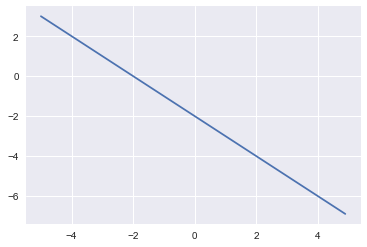

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x = np.arange(-5, 5, 0.1)
y1 = (-2*x - 4) / 2
y2 = (-1*x - 1) / 3 
plt.plot(x, y1)

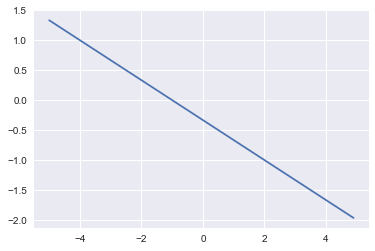

In [29]:
plt.plot(x, y2)

Now, we can see our geometric representation of the equation's above-both straight lines. The fact that they are defined to be a system of equations means that they are both true at the same time (in our current state). Well, when do both equations have the same $x$ and $y$? When they _intersect_!

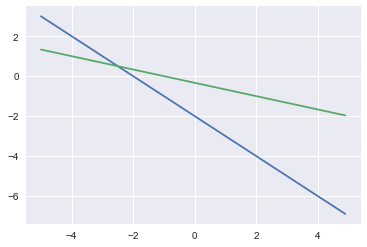

In [30]:
fig, ax = plt.subplots()
plt.plot(x, y1)
plt.plot(x, y2)

We can see above that the intersection point-the point at which both equations have the same $x$ and $y$ values, and hence they are both true-is $x=-2.5$ and $y=0.5$. We can solve it by performing some simple algebraic manipulation, but for now what we really need is to just focus on the underlying geometry.

## 2.2 Linear Algebra View Point
Alright, we have just looked at what a system of equations represents from the perspective of geometric coordinate space. Now, there is an alternative view that is rather power. Let's try and view this system of equations through the lense of linear algebra. 

To begin, we can look at our system of equations again (the 3 dimensional case):

#### $$2x + 5y + 3z = -3$$
#### $$4x + 0y + 8z = 0$$
#### $$1x + 3y + 0z = 2$$

Recall, we did not _need_ to align the system this way; we chose to. The $x$, $y$, and $z$ vertically inline, with the constant on the right, was a choice on our part. Once that choice was made, however, we can see a few things that are rather interesting.

> 1. The left hand side of each equation is a _**linear combination**_ of the variables $x$, $y$, and $z$. 
2. We know that vectors can often be expressed as _linear combinations_ of basis vectors. 
3. It almost looks as though our left hand side could be expressed via matrix vector multiplication-and it can! 

We can express the left hand side of equation as matrix vector multiplication!

#### $$
\begin{bmatrix}
    2 & 5 & 3 \\
    4 & 0 & 8 \\
    1 & 3 & 0 
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} 
$$

To be clear about how we arrived here, let's actually work from this matrix represntation back to our coordinate space system of equations:

#### $$
\begin{bmatrix}
    2 & 5 & 3 \\
    4 & 0 & 8 \\
    1 & 3 & 0 
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
    z
\end{bmatrix} =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} 
$$
#### $$\downarrow$$
#### $$
\begin{bmatrix}
    2 \\
    4 \\
    1 
\end{bmatrix} \cdot x + 
\begin{bmatrix}
    5 \\
    0 \\
    3 
\end{bmatrix} \cdot y +
\begin{bmatrix}
    3 \\
    8 \\
    0 
\end{bmatrix} \cdot z =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} 
$$
#### $$\downarrow$$
#### $$
\begin{bmatrix}
    2x \\
    4x \\
    1x 
\end{bmatrix} + 
\begin{bmatrix}
    5y \\
    0y \\
    3y 
\end{bmatrix} +
\begin{bmatrix}
    3z \\
    8z \\
    0z 
\end{bmatrix} =
\begin{bmatrix}
    -3 \\
    0 \\
    2
\end{bmatrix} 
$$
#### $$\downarrow$$

#### $$
\begin{bmatrix}
    2x + 5y + 3z = -3 \\
    4x + 0y + 8z = 0 \\
    1x + 3y + 0z = 2
\end{bmatrix}
$$

We have just shown how these two representations-one in coordinate and one in vector space-are equivalent. From the linear algebra matrix-vector multiplication side of things, we can interpret it as follows:
> What vector $\begin{bmatrix}x \\y \\z\end{bmatrix}$ can be linearly transformed via the matrix: $\begin{bmatrix}2 & 5 & 3 \\4 & 0 & 8 \\1 & 3 & 0 \end{bmatrix}$ and result in the output vector: $\begin{bmatrix}-3 \\0 \\2\end{bmatrix}$? 

Now, the above is a vector space interpretation of our problem! It may feel a little strange at first, because it is living in a different space than our coordinate interpretation. 

TODO: Go through linear algebra portion. 

## Scenario
#### $$2x + 2y = -4$$
#### $$1x + 3y = -1$$
#### $$
\begin{bmatrix}
    2  & 2\\
    1  & 3
\end{bmatrix}
\begin{bmatrix}
    x \\
    y 
\end{bmatrix} = 
\begin{bmatrix}
    -4 \\
    -1
\end{bmatrix}$$
#### $$A \vec{x} = \vec{v}$$

In [21]:
x = np.arange(-10, 10, 0.1)

In [22]:
y1 = (-2*x - 4) / 2

y2 = (-1*x - 1) / 3 

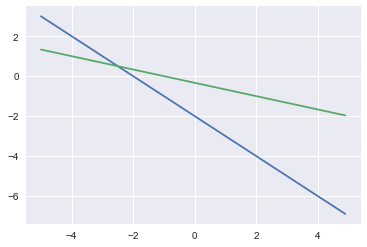

In [33]:
fig, ax = plt.subplots()
plt.plot(x, y1)
plt.plot(x, y2)

We can see that our two equations intersect at: (-2.5, 0.5). This is where our system of equations is holding true in our current world (scenario). Let's see the vector that our system of equations solves for:

In [2]:
import numpy as np
A = np.array([[2, 2], [1, 3]])
b = np.array([-4, -1])

xvec = np.linalg.solve(A, b)
print(xvec)

[-2.5  0.5]


Awesome! The vector x that our system solves for is also -2.5, 0.5! After the transformation is performed, our x vector would land on -4, -1. 

This is a very cool way to look at things. When looking at the original equations: 

#### $$2x + 2y = -4$$
#### $$1x + 3y = -1$$

You may wonder to yourself: "What exactly do the -4 and -1 represent?". They don't show up in the plot, and they aren't part of either functions curve. What is very interesting is that they instead have a direct representation in our linear transformation! They represent the resulting vector that our intersection vector (-2.5, 0.5) ends up at after it has been transformed via the matrix A. 

In [54]:
np.dot(A, xvec)

array([-4., -1.])

In [59]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.75, -0.5 ],
       [-0.25,  0.5 ]])

In [58]:
np.linalg.solve(Ainv, xvec)

array([-4., -1.])

# KEY POINT
* A system of equations is representing the world, and all must hold at one single time
* This system can be represented as a matrice
* The first row in this matrice, when dotted with our vector [x,y], shows the location that our x basis vector ends up at (after the entire 3d input space is squished into the x dimension)
* This is then repeated for the others

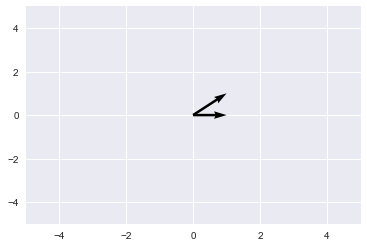

In [50]:
sns.set()
# plt.quiver([0, 0, 0], [0, 0, 0], [1, -2, 4], [1, 2, -7], angles='xy', scale_units='xy', scale=1)
plt.quiver([0], [0], [1, 1], [1, 0], angles='xy', scale_units='xy', scale=1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

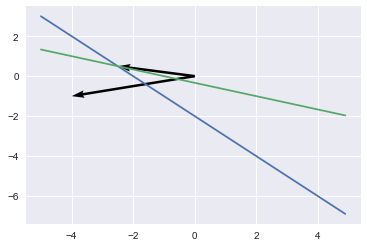

In [53]:
fig, ax = plt.subplots()
plt.plot(x, y1)
plt.plot(x, y2)
plt.quiver([0], [0], [-2.5, -4], [0.5, -1], angles='xy', scale_units='xy', scale=1)


https://math.stackexchange.com/questions/2055226/linear-algebra-how-to-interpret-vectors-and-equations-of-a-system-of-equations
* column space?
* row space
* read comments

In [ ]:
np.l